# Day 2 - Introduction to Python
## What are Jupyter Notebooks

A web-based, interactive computing tool for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.
- Ctrl-Enter: run cell in-place
- Shift-Enter: run cell
- Alt-Enter: run cell, insert below

In [1]:
print("Hello World!")

Hello World!


In [2]:
# Here I am printing
print(5)
print(1+1)

5
2


## Variables
When declaring a variable, capitalization is important!

In [3]:
Five = 5
one = 1
twodot = 2.0
print (Five)
print (one + one)
message = "This is a string"
print (message)

5
2
This is a string


In [4]:
print (type(one))

<class 'int'>


In [5]:
print (type(twodot))

<class 'float'>


In [6]:
print("hello" + "world")
print("number" * 5)

helloworld
numbernumbernumbernumbernumber


In [7]:
print("some" + str(1))

some1


In [8]:
year="2020"
print(int(year)+1)

2021


## Arithmetic Operations

Addition +

Subtraction -

Division /

Modulo %

Multiplication *

Floor division //

The power of **

In [9]:
print(5%2)
print(5/2)
print(5//2)
print(2**3)

1
2.5
2
8


## Reading from the Keyboard

In [10]:
numIn = input("Please enter a number: ")

Please enter a number: 1986


In [11]:
print ("The number that you wrote was : ", numIn)
print ("The number that you wrote was : %d" % numIn)

The number that you wrote was :  1986


TypeError: %d format: a number is required, not str

In [12]:
nameIn = input("Please enter your name: ")
print ("Hello %s, you entered the number %s" % (nameIn,numIn))

Please enter your name: Ernesto
Hello Ernesto, you entered the number 1986


## Writing and Reading Files
When opening a file, you need to decide “how” you want to open it: Just read? Are you going to write to the file? If the file already exists, what do you want to do with it?

- r: read only (default)
- w: write mode, file will be overwritten if it already exists
- a: append mode, data will be appended to the existing file

In [13]:
my_file = open("output_file.txt",'w')
var1 = "This is a string\n"
my_file.write(var1)
var2 = 10
my_file.write("\n")
my_file.write(str(var2))
var3 = 20.0
my_file.write("\n")
my_file.write(str(var3))
my_file.close()

In [14]:
my_file = open("output_file.txt",'r')
content = my_file.read()
print(content)
my_file.close()

This is a string

10
20.0


In [15]:
my_file = open("output_file.txt",'r')
var1 = my_file.readline()
var2 = my_file.readline()
var3 = my_file.readline()
var4 = my_file.readline()
print("String: ", var1)
print("Blank: ", var2)
print("Integer: ", var3)
print("Float: ", var4)
my_file.close()

String:  This is a string

Blank:  

Integer:  10

Float:  20.0


## if/else/elif
Indentation matters!

In [16]:
a=2
b=5
print("Is a bigger than b?", a>b)
print("Is a smaller than b?", a<b)
print("Is a equal to b?", a == b)
print("Is a different from b?", a != b)
print("Is a different from b or bigger than b?", a != b or a>b)
print("Is a different from b and bigger than b?", a != b and a>b)

Is a bigger than b? False
Is a smaller than b? True
Is a equal to b? False
Is a different from b? True
Is a different from b or bigger than b? True
Is a different from b and bigger than b? False


In [17]:
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
else:
    print("a is equal to b")

a is smaller than b


In [18]:
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
    if a>0:
        print("a is positive")
else:
    print("a is equal to b")

a is smaller than b
a is positive


## Loops
Indentation is IMPORTANT!

In [19]:
for x in range(0,3):
    print("x = %d" % x)

x = 0
x = 1
x = 2


In [20]:
for x in range(0,3):
    for y in range(0,3):
        print("(x,y) = (%d,%d)" % (x,y))

(x,y) = (0,0)
(x,y) = (0,1)
(x,y) = (0,2)
(x,y) = (1,0)
(x,y) = (1,1)
(x,y) = (1,2)
(x,y) = (2,0)
(x,y) = (2,1)
(x,y) = (2,2)


In [21]:
i = 0
while(i < 10):
    print(i)
    i = i+1

0
1
2
3
4
5
6
7
8
9


## Lists

In [22]:
mylist1 = ["first item", "second item"]
mylist2 = [1, 2, 3, 4]
mylist3 = ["first", "second", 3]
print(mylist1[0], mylist1[1])
print(mylist2[0])
print(mylist3)
print(type(mylist3[0]))
print(type(mylist3[2]))

first item second item
1
['first', 'second', 3]
<class 'str'>
<class 'int'>


In [23]:
mylist3[1]=2.0
mylist3.append("LNCC")
for item in mylist3:
    print(item)

first
2.0
3
LNCC


In [24]:
print("Is 3 in mylist3?", 3 in mylist3)

Is 3 in mylist3? True


## Tuple
A tuple is a collection which is ordered and unchangeable

In [25]:
mytuple = ("apple", "banana", 3)
for item in mytuple:
    print(item)

apple
banana
3


In [26]:
mytuple[1]=3

TypeError: 'tuple' object does not support item assignment

## User defined functions
User-defined functions are reusable code blocks; they only need to be written once, then they can be used multiple times.

In [27]:
def addNumbers(n1,n2,n3):
    sum123 = n1+n2+n3
    return sum123

In [28]:
total=addNumbers(2,4,5)
print(total)

11


## Anonymous Functions

In [29]:
x = lambda a: a*10
print(x(10))

100


In [30]:
def myfunc(x):
    return lambda a: a*x

In [31]:
y=myfunc(10)
print(y(5))

50


In [32]:
z=myfunc(100)
print(z(5))

500


## Defining the model
Let N be the number of tumor cells and assume that this number can increase with a growth rate of $g$ cells/hour until it reaches the environmental carrying capacity of $K$ cells. With these assumptions, the mathematical model is:
\begin{equation}
\frac{dN}{dt}=gN\left(1-\frac{N}{K}\right),
\end{equation}

- $g$: tumor growth rate;
- $K$: environmental carrying capacity;

In [33]:
# Let y be the vector of outputs, t the time, and theta the vector of parameters
def control_tumor(y, t, theta):
    return theta[0] * y[0] * (1.0 - y[0] / theta[1])

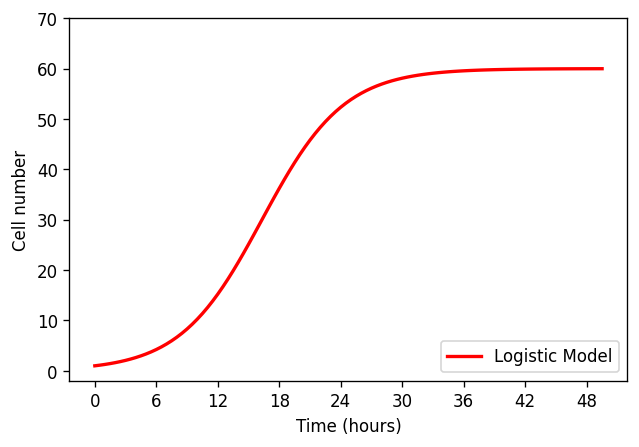

In [58]:
import numpy as np
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
true_growth, true_ic, true_carry = 0.25, 1, 60
# Solving the ODE model
from scipy.integrate import odeint
sol = odeint(control_tumor, t=times, y0=true_ic, args=tuple([[true_growth,true_carry]]))
# Plotting the solution
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=120)
plt.plot(times, sol, label='Logistic Model', color='red',linewidth=2.0)
plt.legend(loc='lower right')
plt.xticks(range(0, 49, 6))
plt.yticks(range(0, 71, 10))
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()

## Adding drug
Let C be the drug concentration (ng/mL) and assume that: it is being constantly delivered at a rate $a$, it naturally decays at a rate $b$, and it is consumed by the tumor by a rate $r$. The number of cells will decrease proportionally to the drug concentration at a rate $f$. With these assumptions, the mathematical model is:
\begin{align}
\frac{dN}{dt}&=gN\left(1-\frac{N}{K}\right)-fCN,\\
\frac{dC}{dt}&=a-bN-rCN.
\end{align}

- $g$: tumor growth rate;
- $K$: environmental carrying capacity;
- $f$: tumor death rate due to the drug
- $a$: drug delivery
- $b$: durg natural decay
- $r$: drug consumption rate

In [38]:
#theta = (g,K,f,a,b,r)
def treated_tumor(y, t, theta):
    tumor=theta[0] * y[0] * (1.0 - y[0] / theta[1])-theta[2]*y[0]*y[1]
    drug=theta[3]-theta[4]*y[1]-theta[5]*y[0]*y[1]
    return [tumor,drug]

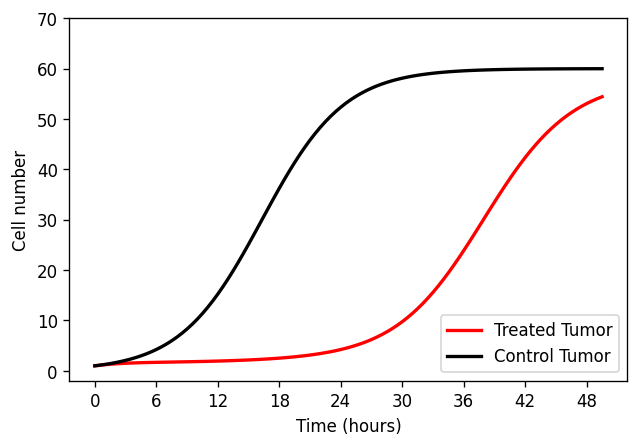

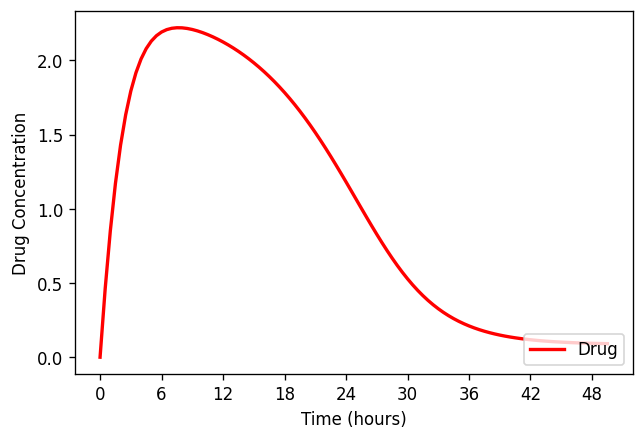

In [73]:
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
g = 0.25
K = 60
f = 0.1
a = 1.0
b = 0.1
r = 0.2
tumor_ic = 1
drug_ic = 0
# Solving the ODE model
y = odeint(treated_tumor, t=times, y0=[tumor_ic,drug_ic], args=tuple([[g,K,f,a,b,r]]))
# Plotting the tumor solution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, y[:,0], label='Treated Tumor', color='red',linewidth=2.0)
sol = odeint(control_tumor, t=times, y0=tumor_ic, args=tuple([[g,K]]))
plt.plot(times, sol, label='Control Tumor', color='black',linewidth=2.0)
plt.legend(loc='lower right')
plt.xticks(range(0, 49, 6))
plt.yticks(range(0, 71, 10))
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()
# Plotting the drugsolution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, y[:,1], label='Drug', color='red',linewidth=2.0)
plt.legend(loc='lower right')
plt.xticks(range(0, 49, 6))
#plt.yticks(range(0, 71, 10))
plt.xlabel('Time (hours)')
plt.ylabel('Drug Concentration');
#plt.savefig("just_data.pdf")
plt.show()

In [74]:
list1=[g,K,f,a,b,r]
list2=[[g,K,f,a,b,r]]
tuple1=([[g,K,f,a,b,r]])

In [70]:
len(list1)

6

1

1